# 1.IMPORT THE LIBRARIES

In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# 2.LOAD THE DATASET

In [104]:
data=pd.read_csv("Mall_Customers.csv")

In [105]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [106]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [107]:
data.shape

(200, 5)

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [109]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [110]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


#3.PERFORM BELOW VISUALIZATION
##A.UNIVARITE ANALYSIS

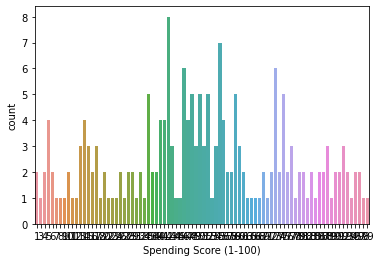

In [111]:
sns.countplot(data["Spending Score (1-100)"])

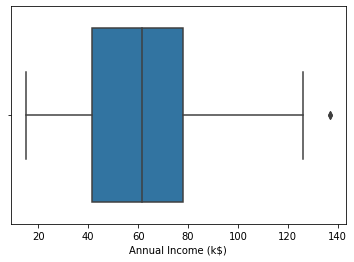

In [112]:
sns.boxplot(data["Annual Income (k$)"])

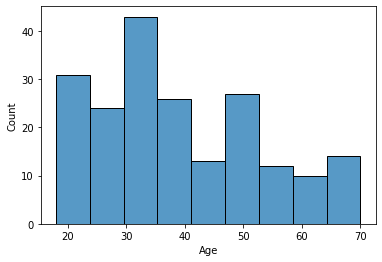

In [113]:
sns.histplot(data["Age"])

##B.BIVARITE ANALYSIS

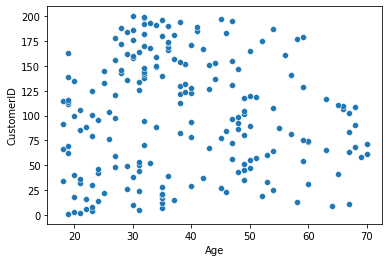

In [114]:
sns.scatterplot(data.Age,data.CustomerID)

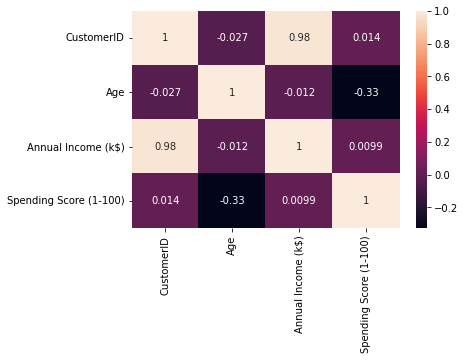

In [115]:
sns.heatmap(data.corr(),annot=True)

##C.MULTI-VARIATE ANALYSIS

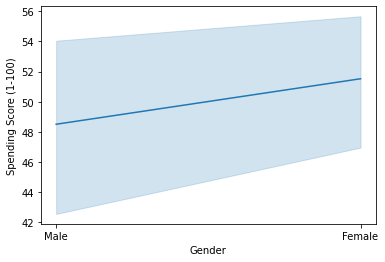

In [116]:
sns.lineplot(data['Gender'],data['Spending Score (1-100)'])

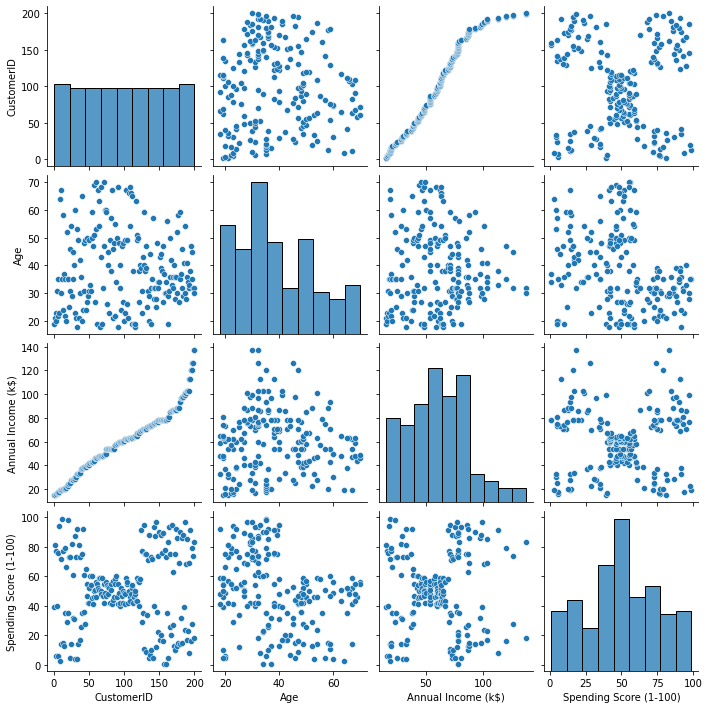

In [117]:
sns.pairplot(data)

#4.PERFORM THE DESCRIPTIVE STATISTICS ON THE DATASET

In [118]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [119]:
data.skew()

CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [120]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [121]:
print("Mean=",data["Annual Income (k$)"].mean())
print("Mean after roundoff=", round(data["Annual Income (k$)"].mean(),2))

Mean= 60.56
Mean after roundoff= 60.56


In [122]:
print("Mode=",data["Annual Income (k$)"].mode())

Mode= 0    54
1    78
dtype: int64


In [123]:
print("Standard deviation=",round(data["Annual Income (k$)"].std(),2))

Standard deviation= 26.26


In [124]:
print("Range=",round(data["Annual Income (k$)"].max()-data["Annual Income (k$)"].min(),2))

Range= 122


#5.CHECK FOR MISSING VALUES AND DEAL WITH THEM

In [125]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [126]:
data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [127]:
data.duplicated().sum()

0

#6.FIND THE OUTLIERS AND REPLACE THE OUTLIERS

In [132]:
iq=data.quantile(q=[0.50,0.75])
iq

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.50,100.50,36.0,61.5,50.0
0.75,150.25,49.0,78.0,73.0


In [129]:
iq.iloc[0]
iq.iloc[1]
IQR = iq.iloc[0] - iq.iloc[1]
upper_extrem = iq.iloc[0] + ( 2.5 * IQR)  
lower_extrem = iq.iloc[1] - ( 2.5 * IQR)   
upper_extrem

CustomerID               -23.875
Age                        3.500
Annual Income (k$)        20.250
Spending Score (1-100)    -7.500
dtype: float64

In [130]:
lower_extrem

CustomerID                274.625
Age                        81.500
Annual Income (k$)        119.250
Spending Score (1-100)    130.500
dtype: float64

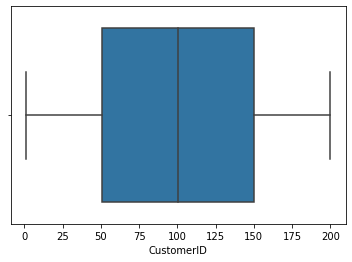

In [131]:
sns.boxplot(data.CustomerID)

#7.CHECK FOR CATEGORICAL COLUMNS AND PERFORM ENCODING

In [133]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.main = le.fit_transform(data.Age)
data.main

array([ 1,  3,  2,  5, 13,  4, 17,  5, 44, 12, 47, 17, 40,  6, 19,  4, 17,
        2, 34, 17, 17,  7, 28, 13, 36, 11, 27, 17, 22,  5, 42,  3, 35,  0,
       31,  3, 24, 12, 18,  2, 45,  6, 30, 13, 31,  6, 32,  9, 11, 13, 31,
       15, 13, 41, 32, 29, 33, 49,  9, 35, 50,  1, 47, 36, 43,  0, 25, 48,
        1, 14, 50, 29, 42, 42, 41,  8, 27, 22,  5, 31, 39, 20, 47, 28,  3,
       30, 37,  4, 16, 32, 48,  0, 30, 22, 14,  6, 29,  9, 30,  2,  5, 31,
       47,  8, 31,  3, 46, 36, 48, 46, 45,  1, 20,  1,  0,  1, 43, 31, 33,
       32,  9, 20, 22, 21,  5, 13, 25, 22, 41, 20, 29, 21,  7, 13,  2, 11,
       26, 14,  1, 17, 39, 14, 10, 14,  7, 10, 30, 14, 16, 16, 25, 21, 26,
       20, 29,  9, 19, 12, 16, 12, 38, 11,  1, 13, 32, 18, 24, 15, 18, 14,
       22, 10, 18, 18, 34, 12, 40,  9, 41, 17, 19, 14, 28, 11, 23, 12, 36,
       10, 23, 18, 16, 14, 15, 20, 29, 17, 27, 14, 14, 12])

In [134]:
data.main=pd.get_dummies(data.CustomerID)
data.main

,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [135]:
pd.get_dummies(data).tail()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
195,196,35,120,79,1,0
196,197,45,126,28,1,0
197,198,32,126,74,0,1
198,199,32,137,18,0,1
199,200,30,137,83,0,1


In [136]:
numeric_data = data.select_dtypes(include=[np.number]) 
categorical_data = data.select_dtypes(exclude=[np.number]) 
print("Number of numerical variables: ", numeric_data.shape[1]) 
print("Number of categorical variables: ", categorical_data.shape[1])

Number of numerical variables:  4
Number of categorical variables:  1


In [144]:
data.select_dtypes(include='object').columns
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [145]:
data['Gender'].replace({'Male':1,'Female':0},inplace=True)
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


#8.SCALING THE DATA
##Split the data into dependent and independent variables

In [147]:
x=data.iloc[:,1:7]
x.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [148]:
y=data.iloc[:,4].values
y

array([39, 81,  6, 77, 40, 76,  6, 94,  3, 72, 14, 99, 15, 77, 13, 79, 35,
       66, 29, 98, 35, 73,  5, 73, 14, 82, 32, 61, 31, 87,  4, 73,  4, 92,
       14, 81, 17, 73, 26, 75, 35, 92, 36, 61, 28, 65, 55, 47, 42, 42, 52,
       60, 54, 60, 45, 41, 50, 46, 51, 46, 56, 55, 52, 59, 51, 59, 50, 48,
       59, 47, 55, 42, 49, 56, 47, 54, 53, 48, 52, 42, 51, 55, 41, 44, 57,
       46, 58, 55, 60, 46, 55, 41, 49, 40, 42, 52, 47, 50, 42, 49, 41, 48,
       59, 55, 56, 42, 50, 46, 43, 48, 52, 54, 42, 46, 48, 50, 43, 59, 43,
       57, 56, 40, 58, 91, 29, 77, 35, 95, 11, 75,  9, 75, 34, 71,  5, 88,
        7, 73, 10, 72,  5, 93, 40, 87, 12, 97, 36, 74, 22, 90, 17, 88, 20,
       76, 16, 89,  1, 78,  1, 73, 35, 83,  5, 93, 26, 75, 20, 95, 27, 63,
       13, 75, 10, 92, 13, 86, 15, 69, 14, 90, 32, 86, 15, 88, 39, 97, 24,
       68, 17, 85, 23, 69,  8, 91, 16, 79, 28, 74, 18, 83])

##scaling the data

In [149]:
from sklearn.preprocessing import StandardScaler

In [150]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler(feature_range=(0,1))
n= min_max.fit_transform(x)
n

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.        , 0.25      , 0.01639344, 0.39795918],
       [0.        , 0.07692308, 0.01639344, 0.76530612],
       [0.        , 0.32692308, 0.02459016, 0.05102041],
       [0.        , 0.09615385, 0.02459016, 0.94897959],
       [1.        , 0.88461538, 0.03278689, 0.02040816],
       [0.        , 0.23076923, 0.03278689, 0.7244898 ],
       [1.        , 0.94230769, 0.03278689, 0.13265306],
       [0.        , 0.32692308, 0.03278689, 1.        ],
       [0.        , 0.76923077, 0.04098361, 0.14285714],
       [0.        , 0.11538462, 0.04098361, 0.7755102 ],
       [1.        , 0.36538462, 0.04098361, 0.12244898],
       [1.        , 0.07692308, 0.04098361, 0.79591837],
       [0.        , 0.32692308, 0.04918033, 0.34693878],
       [1.        , 0.03846154,

#9.PERFORM ANY CLUSTRING ALGORITHMS

In [151]:
y=data.iloc[:,[2,4]].values

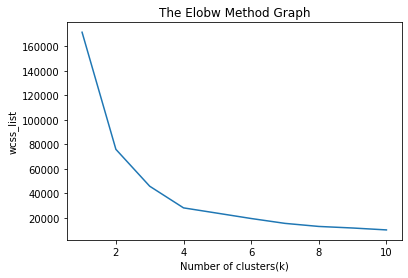

In [152]:
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(y)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [153]:
model=KMeans(n_clusters=4)
model.fit(data)

KMeans(n_clusters=4)

In [154]:
mb=pd.Series(model.labels_)
data['Cluster']=mb
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,2
197,198,1,32,126,74,1
198,199,1,32,137,18,2


In [155]:
mb=pd.Series(model.labels_)
data.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0


#10.ADD THE CLUSTER DATA WITH THE PRIMARY DATASET

In [156]:
data['Cluster']=kmeans.labels_
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,6
1,2,1,21,15,81,1
2,3,0,20,16,6,8
3,4,0,23,16,77,1
4,5,0,31,17,40,6


In [157]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
195,196,0,35,120,79,1
196,197,0,45,126,28,9
197,198,1,32,126,74,1
198,199,1,32,137,18,2
199,200,1,30,137,83,4


#11.SPLIT THE DATA INTO DEPENDENT AND INDEPENDENT VARIABLES 

In [158]:
X = data.drop("CustomerID",axis=1)
Y = data['CustomerID']

In [159]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(data['Spending Score (1-100)'])
data["Spending Score (1-100)"] = label

In [160]:
data['Spending Score (1-100)'].value_counts()

33    8
46    7
37    6
60    6
28    5
     ..
25    1
35    1
44    1
54    1
16    1
Name: Spending Score (1-100), Length: 84, dtype: int64

#12.SPLIT THE DATA INTO TRAINING AND TESTING 

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
y = data["Gender"]
x = data.drop(columns = ["Gender"])

In [163]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [164]:
x_train.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
134,135,20,73,3,8
66,67,43,48,41,0
26,27,45,28,26,9
113,114,19,64,37,6
168,169,36,87,22,9


In [165]:
x_test.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
18,19,52,23,24,9
170,171,40,87,11,2
107,108,54,63,37,0
98,99,48,61,33,0
177,178,27,88,57,1


In [166]:
y_train.head()

134    1
66     0
26     0
113    1
168    0
Name: Gender, dtype: int64

In [167]:
y_test.head()

18     1
170    1
107    1
98     1
177    1
Name: Gender, dtype: int64

In [168]:
x_train.shape,x_test.shape

((160, 5), (40, 5))

In [169]:
y_train.shape,y_test.shape

((160,), (40,))

#13.BULID THE MODEL

In [170]:
from sklearn.tree import DecisionTreeClassifier

In [171]:
model = DecisionTreeClassifier()

In [172]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

#14.TRAIN THE MODEL

In [173]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [174]:
pred = model.predict(x_train)

In [175]:
print("Accuracy score :",accuracy_score(y_train,pred))
print("Precision score :",precision_score(y_train,pred,average="micro"))

Accuracy score : 1.0
Precision score : 1.0


In [176]:
print(confusion_matrix(y_train,pred))

[[92  0]
 [ 0 68]]


#15.TEST THE MODEL

In [177]:
pred = model.predict(x_test)
pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1])

In [178]:
print("Accuracy score :",accuracy_score(y_test,pred))
print("Precision score :",precision_score(y_test,pred,average="micro"))

Accuracy score : 0.575
Precision score : 0.575


In [179]:
print(confusion_matrix(y_test,pred))

[[11  9]
 [ 8 12]]


#16.MEASURE THE PEERFORMANCE USING EVALUATION METRICS 

In [180]:
print("Accuracy score :",accuracy_score(y_test,pred))
print("Precision score :",precision_score(y_test,pred,average="macro"))
print("Confustion matrix :",confusion_matrix(y_test,pred))

Accuracy score : 0.575
Precision score : 0.575187969924812
Confustion matrix : [[11  9]
 [ 8 12]]
